<a href="https://colab.research.google.com/github/DrumDong/Donggyu/blob/master/titanic1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 2. 데이터 가져오기

In [0]:
import pandas as pd

train = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/titanic/train.csv')
test = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/titanic/test.csv')

In [94]:
train[759:760]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S


# 3. Exploratory Data Analysis 

In [95]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data Dictionary

- survived : 생존 여부
- pclass: 좌석 긍급
- SibSp: 배우자 여부
- Parch: 부모 또는 자식 여부
- Fare: 요금
- Cabin: Cabin number
- Embarked: 선착장 위치

In [96]:
test.head() #생존여부를 확인하기위해 생존여부(Survived) 컬럼 삭제

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


생존 여부를 알아야하므로 Survived 컬럼이 없음.

In [97]:
train.shape

(891, 12)

In [98]:
test.shape

(418, 11)

In [99]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


몇명의 나이와 수하물의 위치가 유실된 것을 알 수 있음. -> 이것을 그대로 넣으면 안됨.(Feature Engineering 필요)

In [100]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [101]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## 시각화

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() #setting seaborn default for plots

In [0]:
def bar_chart(feature):
  survived = train[train['Survived']==1][feature].value_counts()
  dead = train[train['Survived']==0][feature].value_counts()
  df = pd.DataFrame([survived,dead])
  df.index = ['Survived','Dead']
  
  print(df)
  df.plot(kind='bar',stacked=True,figsize=(10,5))
  
  

          female  male
Survived     233   109
Dead          81   468


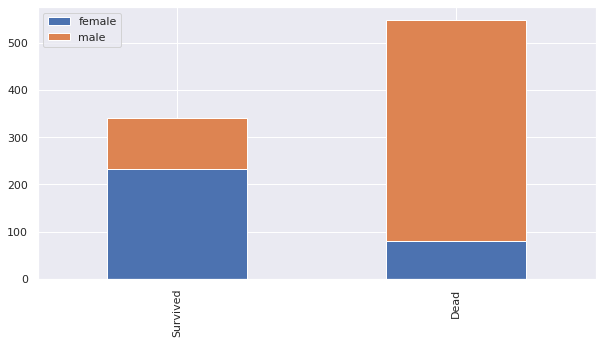

In [104]:
bar_chart('Sex')

여자들이 남자보다 많이 살아남았다는 가설을 수립

            1   2    3
Survived  136  87  119
Dead       80  97  372


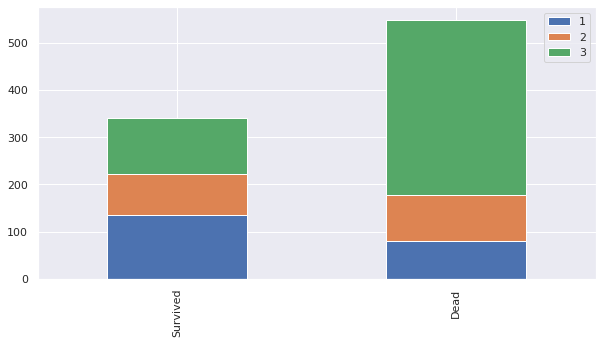

In [105]:
bar_chart('Pclass')

자리등급이 생존에 영향을 많이 끼친다는 가설 수립

              0      1     2     3     4    5    8
Survived  210.0  112.0  13.0   4.0   3.0  NaN  NaN
Dead      398.0   97.0  15.0  12.0  15.0  5.0  7.0


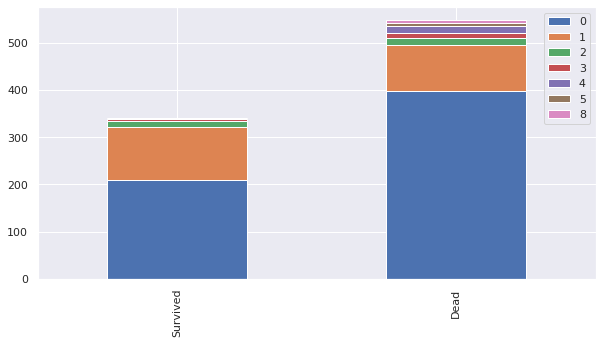

In [106]:
bar_chart('SibSp')

가족이 있을 경우에 조금더 많이 살은 것 같음

              0     1     2    3    4    5    6
Survived  233.0  65.0  40.0  3.0  NaN  1.0  NaN
Dead      445.0  53.0  40.0  2.0  4.0  4.0  1.0


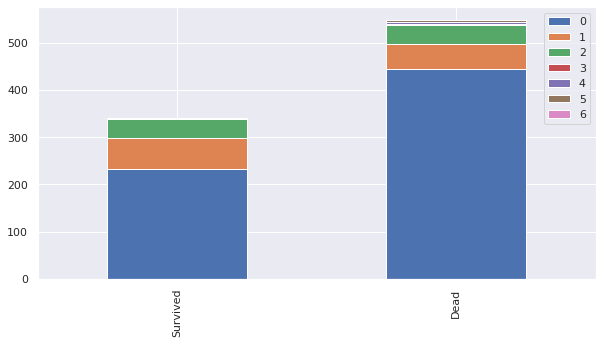

In [107]:
bar_chart('Parch')

            S   C   Q
Survived  217  93  30
Dead      427  75  47


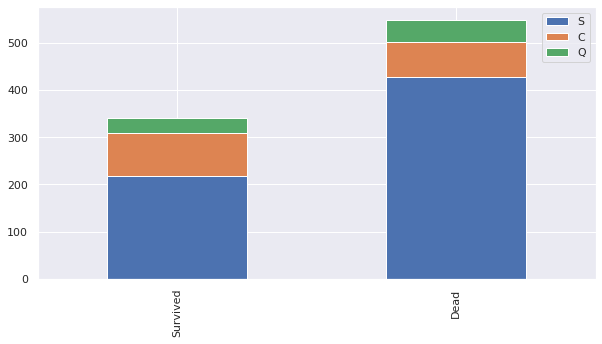

In [108]:
bar_chart('Embarked')

# Feature Engineering ★
- Feature : 컬럼 -> 측량이 된 값들, 텍스트 변수들을 숫자로 변경할 필요성이 있음. 또한 없는 변수들도 알맞게 변경을 해야함.

In [109]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 4.2 Name
- Mr, Mrs, Miss 와 같이 성별, 가족여부를 판단할 수 있기 때문에 이것을 분리할 필요가 있음.
- [A-Za-z] : 알파벳 문자

In [0]:
train_test_data = [train,test] # combining train and test dataset

for dataset in train_test_data:
  dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.',expand=False)

In [111]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Capt          1
Ms            1
Countess      1
Sir           1
Lady          1
Mme           1
Jonkheer      1
Don           1
Name: Title, dtype: int64

In [112]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [0]:
title_mapping = {'Mr':0,'Miss':1,'Mrs':2,
                'Master':3,'Dr':3,'Rev':3,'Col':3,'Major':3,'Mlle':3,'Countess':3,
                'Ms':3,'Lady':3,'Jonkheer':3,'Don':3,'Dona':3,'Mme':3,'Capt':3,'Sir':3}

for dataset in train_test_data:
  dataset['Title'] = dataset['Title'].map(title_mapping)

In [114]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [115]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


            0    1   2   3
Survived   81  127  99  35
Dead      436   55  26  32


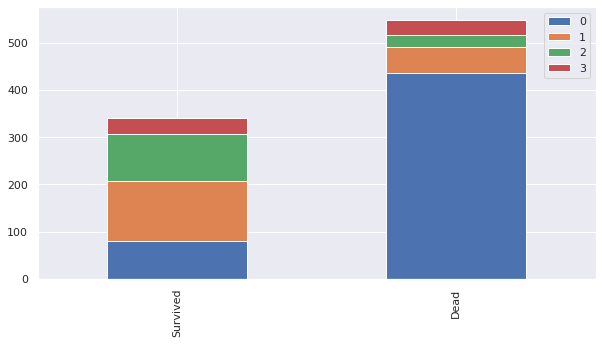

In [116]:
bar_chart('Title') # 0: Mr, 1: Miss, 2: Mrs

이제 Name 컬럼은 필요가 없으니 삭제를 하자.

In [0]:
# delete unnecessaray feature from dataset
train.drop('Name',axis=1, inplace=True)
test.drop('Name',axis=1, inplace=True)

In [118]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [119]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


## 4.3 Sex
- male:0, female:1

In [0]:
sex_mapping ={'male':0,'female':1}
for dataset in train_test_data:
  dataset['Sex']=dataset['Sex'].map(sex_mapping)

            0    1
Survived  109  233
Dead      468   81


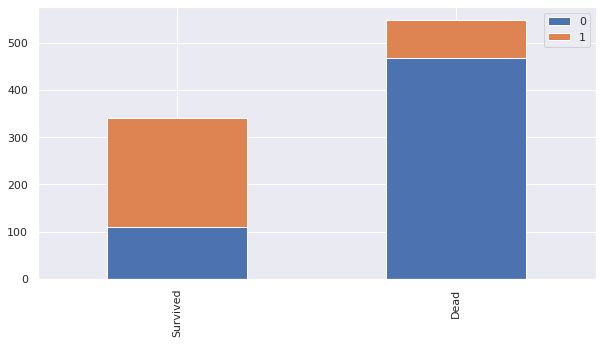

In [121]:
bar_chart('Sex')

## 4.4 Age
- 몇몇 age는 NaN값으로 되어있음. -> Missing age에 median 값을 넣어주자

In [122]:
train.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,NaN,0,0,374910,8.0500,NaN,S,0
96,97,0,1,0,71.0,0,0,PC 17754,34.6542,A5,C,0
97,98,1,1,0,23.0,0,1,PC 17759,63.3583,D10 D12,C,0
98,99,1,2,1,34.0,0,1,231919,23.0000,NaN,S,2


In [0]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'),inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'),inplace=True)

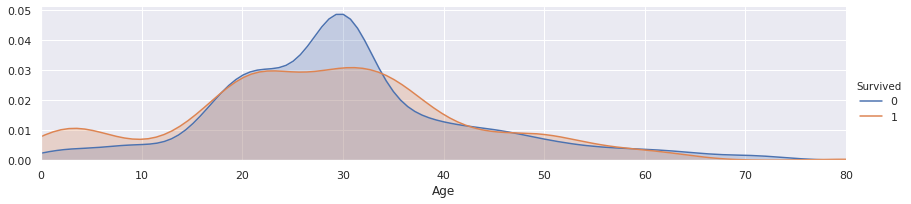

In [124]:
facet = sns.FacetGrid(train,hue ='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.show()

- 0부터 16, 16-26, 26-36, 36-62, 62이상 구간마다 생존 여부의 차이를 발견할 수 있음.

(0, 20)

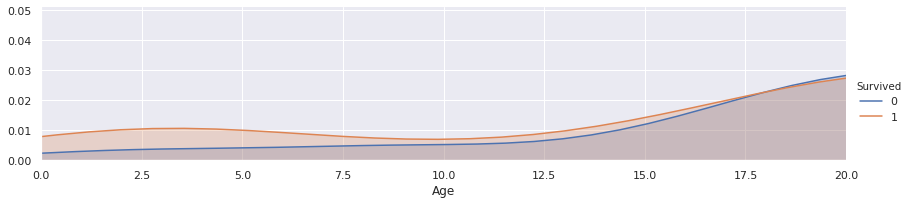

In [125]:
facet = sns.FacetGrid(train,hue ='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.xlim(0,20)

(20, 40)

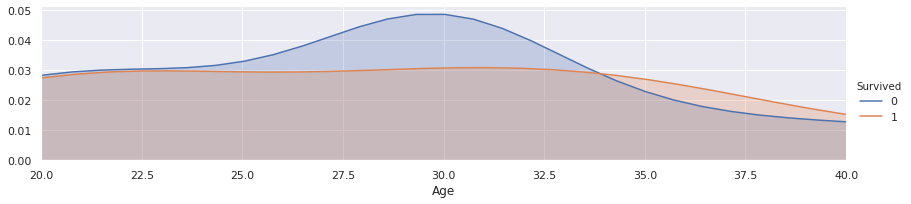

In [126]:
facet = sns.FacetGrid(train,hue ='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.xlim(20,40) 

### 4.4.3 Binnig
- 카테고리별로 나이를 담는 것 (10대, 20대,30대)
- Sequential한 정보를 처리할 때 쓰임

In [0]:
for dataset in train_test_data:
  dataset.loc[dataset['Age']<=16,'Age']=0,
  dataset.loc[(dataset['Age']>16) & (dataset['Age']<=26),'Age']=1,
  dataset.loc[(dataset['Age']>26) & (dataset['Age']<=36),'Age']=2,
  dataset.loc[(dataset['Age']>36) & (dataset['Age']<=62),'Age']=3,
  dataset.loc[dataset['Age']>62,'Age']=4
              

In [128]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


          2.0  1.0  3.0  0.0  4.0
Survived  116   97   69   57    3
Dead      220  158  111   48   12


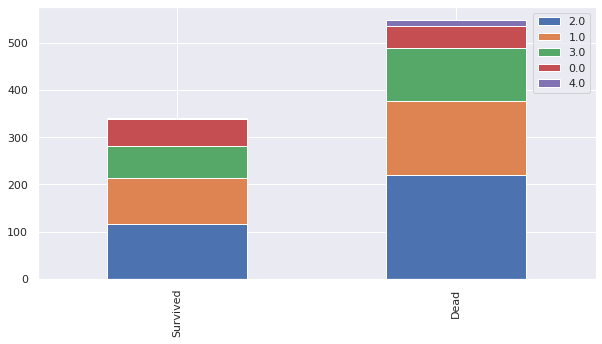

In [129]:
bar_chart('Age')

## 4.5 Embarked

### 4.5.1 filling missing values

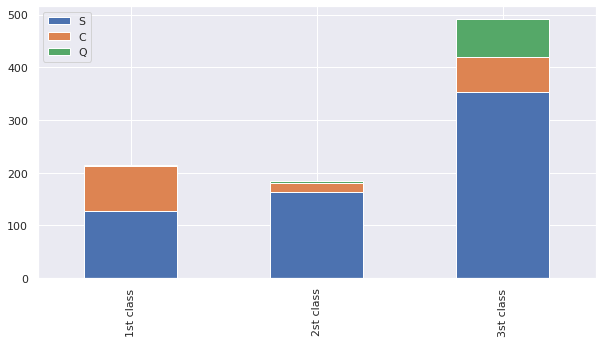

In [130]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()

df=pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st class','2st class','3st class']
df.plot(kind='bar',stacked=True,figsize=(10,5))

- S도시가 모든 좌석별로 거의 절반 이상 차지하기 때문에 Embarked 정보가 없으면 S로 해도 괜찮을 것 같음.

In [0]:
for dataset in train_test_data:
  dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [132]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [0]:
embarked_mapping={'S':0,'C':1,'Q':2}
for dataset in train_test_data:
  dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

## 4.6 Fare
- 가격은 좌석과 관련이 있기때문에 'Pclass'의 Fare의 median 값으로 넣어주면 될 듯.

In [0]:
# fill missing Fare with median or each Pclass
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'),inplace=True)
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'),inplace=True)

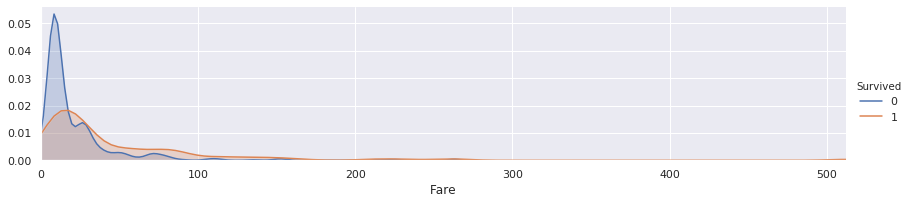

In [135]:
facet = sns.FacetGrid(train,hue ='Survived',aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()

plt.show() #싼 티켓에서 많은 사람이 죽은 것을 확인 할 수있음.

(0, 50)

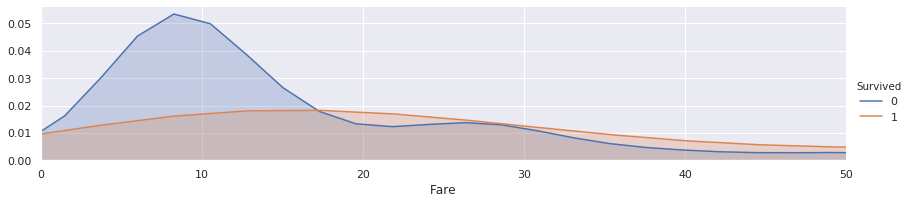

In [136]:
facet = sns.FacetGrid(train,hue ='Survived',aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()

plt.xlim(0,50)

In [0]:
for dataset in train_test_data:
  dataset.loc[dataset['Fare']<=17,'Fare']=0,
  dataset.loc[(dataset['Fare']>17) & (dataset['Fare']<=30),'Fare']=1,
  dataset.loc[(dataset['Fare']>30) & (dataset['Fare']<=100),'Fare']=2,
  dataset.loc[dataset['Fare']>100,'Fare']=3  

In [138]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [139]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,0.0,NaN,2,0
1,893,3,1,3.0,1,0,363272,0.0,NaN,0,2
2,894,2,0,3.0,0,0,240276,0.0,NaN,2,0
3,895,3,0,2.0,0,0,315154,0.0,NaN,0,0
4,896,3,1,1.0,1,1,3101298,0.0,NaN,0,2


## 4.7 Cabin

In [140]:
train.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
C22 C26        3
E101           3
              ..
C106           1
C62 C64        1
A24            1
A6             1
B38            1
Name: Cabin, Length: 147, dtype: int64

In [141]:
for dataset in train_test_data:
  dataset['Cabin'] = dataset['Cabin'].str[:1]

  
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


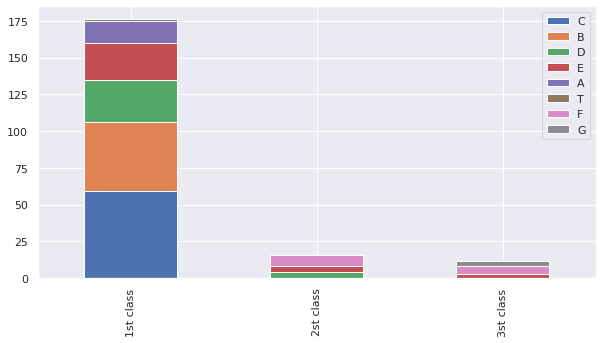

In [142]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()



df=pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st class','2st class','3st class']
df.plot(kind='bar',stacked=True,figsize=(10,5))

In [0]:
cabin_mapping ={'A':0,'B':0.4,'C':0.8,'D':1.2,'E':1.6,'F':2,'G':2.4,'T':2.8}

for dataset in train_test_data:
  dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

- 위에서 feature Scaling을 사용함. 1씩 주면 범위가 너무 커지게 되므로 소수점으로 기준을 둠.

In [0]:
# fill missing Cabin with median Cabin for each Pclass
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'),inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'),inplace=True)

## 4.8 FamilySize

In [0]:
# 변수 만들어 주기

train['FamilySize'] = train['SibSp'] + train['Parch']+1
test['FamilySize'] = test['SibSp'] + test['Parch']+1

(0, 11.0)

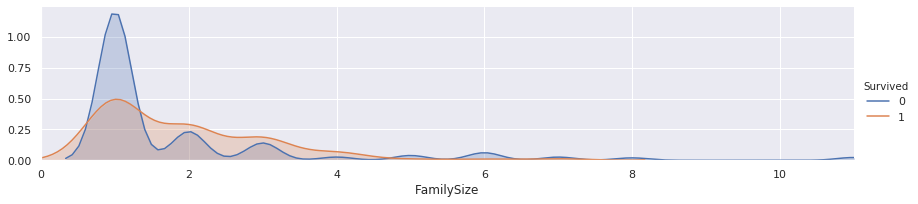

In [146]:
facet = sns.FacetGrid(train,hue ='Survived',aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade=True)
facet.set(xlim=(0,train['FamilySize'].max()))
facet.add_legend()

plt.xlim(0)

In [0]:
family_mapping ={1:0,2:0.4,3:0.8,4:1.2,5:1.6,6:2,7:2.4,8:2.8,9:3.2,10:3.6,11:4}
for dataset in train_test_data:
  dataset['FamilySize']=dataset['FamilySize'].map(family_mapping)

In [148]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [0]:
features_drop=['Ticket','SibSp','Parch']
train=train.drop(features_drop,axis=1)
test=test.drop(features_drop,axis=1)
train= train.drop(['PassengerId'],axis=1)

In [150]:
train_data = train.drop('Survived',axis=1)
target = train['Survived']

train_data.shape,target.shape

((891, 8), (891,))

In [151]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0
5,3,0,2.0,0.0,2.0,2,0,0.0
6,1,0,3.0,2.0,1.6,0,0,0.0
7,3,0,0.0,1.0,2.0,0,3,1.6
8,3,1,2.0,0.0,2.0,0,2,0.8
9,2,1,0.0,2.0,1.8,1,2,0.4


In [152]:
target.head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

# 텐서플로우 구현

In [0]:
import tensorflow as tf
import numpy as np

In [0]:
train_data_tf = np.array(train_data)
target_tf = np.array(target)
target_tf=target_tf.reshape(891,1)

In [155]:
test

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,2.0,2,0,0.0
1,893,3,1,3.0,0.0,2.0,0,2,0.4
2,894,2,0,3.0,0.0,2.0,2,0,0.0
3,895,3,0,2.0,0.0,2.0,0,0,0.0
4,896,3,1,1.0,0.0,2.0,0,2,0.8
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,2.0,0.0,2.0,0,0,0.0
414,1306,1,1,3.0,3.0,0.8,1,3,0.0
415,1307,3,0,3.0,0.0,2.0,0,0,0.0
416,1308,3,0,2.0,0.0,2.0,0,0,0.0


In [156]:
print('train_data.shape:',train_data_tf.shape)
print('target.shape:',target_tf.shape)

X = tf.placeholder('float',[None,8])
Y = tf.placeholder('float',[None,1])

train_data.shape: (891, 8)
target.shape: (891, 1)


In [0]:
W =tf.Variable(tf.random_normal([8,1]),name='weight')
b =tf.Variable(tf.random_normal([1]),name='bias')

In [0]:
logits = tf.matmul(X,W)+b
hypothesis = tf.sigmoid(logits)

##Cost/Loss function

In [0]:
cost= -tf.reduce_mean(Y*tf.log(hypothesis)+(1-Y)*
                      tf.log(1-hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

## Accuracy computatuin

In [0]:
predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32) # True =1 or False =0
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,Y),dtype= tf.float32)) 

In [161]:
with tf.Session() as sess:
  # Initialize Tensorflow variables
  sess.run(tf.global_variables_initializer())
  
  for step in range(10001):
    cost_val,_ = sess.run([cost,train],feed_dict={X:train_data_tf,Y:target_tf})
    #if step % 200 ==0:
      #print(step,cost_val)

  h,c,a =  sess.run([hypothesis,predicted,accuracy],
                  feed_dict={X:train_data_tf,Y:target_tf})

  print('WnHypothesis:',h,'\nCorrect(Y):',c,'\nAccuracy:',a)

  

WnHypothesis: [[0.06914666]
 [0.92344487]
 [0.6428045 ]
 [0.9293101 ]
 [0.07537875]
 [0.12002513]
 [0.42365378]
 [0.2694446 ]
 [0.5108514 ]
 [0.9625765 ]
 [0.56984216]
 [0.8092177 ]
 [0.10307765]
 [0.01256609]
 [0.7172639 ]
 [0.78445375]
 [0.28512883]
 [0.14333555]
 [0.7373067 ]
 [0.76378024]
 [0.22519594]
 [0.10693559]
 [0.80931985]
 [0.2980468 ]
 [0.4347751 ]
 [0.28068513]
 [0.09539038]
 [0.15487632]
 [0.75067663]
 [0.07537875]
 [0.7245652 ]
 [0.959404  ]
 [0.75067663]
 [0.07765791]
 [0.35673338]
 [0.23320955]
 [0.09539038]
 [0.10307765]
 [0.5663574 ]
 [0.6795876 ]
 [0.5340537 ]
 [0.85208106]
 [0.09539038]
 [0.8458667 ]
 [0.75067663]
 [0.07537875]
 [0.08101925]
 [0.75067663]
 [0.07108912]
 [0.7982495 ]
 [0.2928444 ]
 [0.10307765]
 [0.9377981 ]
 [0.85208106]
 [0.18252036]
 [0.39878792]
 [0.78693664]
 [0.09539038]
 [0.70950717]
 [0.14749551]
 [0.12941363]
 [0.85496736]
 [0.23320955]
 [0.19250292]
 [0.33061534]
 [0.39662302]
 [0.8515372 ]
 [0.10307765]
 [0.1160112 ]
 [0.04581448]
 [0.14

# Modeling
- train 데이터로 validation을 해야함. -> 데이터의 특정부분을 정확도를 판단할 용도로 바꿈. 하지만 여기서 편향된 정보가 나올 수 있음.
- k-ford cross validation: round를 거쳐서 편견이 없는 final accuracy를 만들 수 있음.

In [0]:
from sklearn.neighbors import KNeighborsClassifier   #Knn 최근접이웃
from sklearn.tree import DecisionTreeClassifier      #의사결정나무 
from sklearn.ensemble import RandomForestClassifier  #Randomforest
from sklearn.naive_bayes import GaussianNB           #베이즈 분류
from sklearn.svm import SVC                          #support vector machine

import numpy as np

## 5.2 Cross Validation(K-ford) : 교차검증
- 독립 변수의 개수가 많은 빅데이터에서는 과최적화가 쉽게 발생한다.

- 표본 데이터 집합의 종속 변수 값을 얼마나 잘 예측하는가를 검사하는 것을 표본외 성능 검증(out-of-sample testing) 혹은 교차검증(cross validation)이라고 함.
- 데이터의 수가 적은 경우, 검증 데이터의 수를 증가시키면 학습용 데이터의 수가 적어지므로 이것을 해결하기 위해 K-fold 교차검증 방법을 사용

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

- 10개의 부분집합으로 나눔 : 폴드 개수
- shuffle : 샘플의 순서를 뒤죽박죽 섞음.
- random_state : 똑같은 작업 재현 가능





***cross_val_score : 교차검증 반복 ★***
- cross_val_score(model, X, y, scoring=None, cv=None,n_jobs=1)
  - model : 분석 모형
  - X : 독립변수 데이터
  - Y : 종속변수 데이터
  - Scoring : 성능 검증에 사용할 함수 이름
  - cv: 교차검증 생성기 객체 또는 숫자
  - n_jobs: 병렬화 옵션 사용 X   -> 사용해도 안해도 크게 문제가 없음.

### 5.2.1 kNN

In [164]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
#cros_val_score(model, train, target, cross validation)
score = cross_val_score(clf, train_data, target, cv=k_fold, scoring=scoring)
print(score)

[0.82222222 0.76404494 0.80898876 0.83146067 0.87640449 0.82022472
 0.85393258 0.79775281 0.84269663 0.84269663]


In [165]:
#kNN Score
round(np.mean(score)*100,2)

82.6

### 5.2.2 Decision Tree

In [166]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, scoring=scoring)
print(score)

[0.76666667 0.80898876 0.78651685 0.7752809  0.8988764  0.76404494
 0.82022472 0.82022472 0.74157303 0.78651685]


In [167]:
#DecisionTree Score
round(np.mean(score)*100,2)

79.69

### 5.2.3 Random Forest

In [168]:
clf = RandomForestClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, scoring=scoring)
print(score)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

[0.77777778 0.79775281 0.80898876 0.75280899 0.88764045 0.80898876
 0.82022472 0.79775281 0.78651685 0.83146067]


In [169]:
round(np.mean(score)*100,2)

80.7

### 5.2.4 Naive Bayes

In [170]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, scoring=scoring)
print(score)

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.83146067]


In [171]:
round(np.mean(score)*100,2)

78.78

### 5.2.5 SVM

In [172]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, scoring=scoring)
print(score)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

[0.83333333 0.80898876 0.83146067 0.82022472 0.84269663 0.82022472
 0.84269663 0.85393258 0.83146067 0.86516854]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [173]:
round(np.mean(score)*100,2)

83.5

# 6. Testing

In [174]:
clf = SVC()
clf.fit(train_data,target)

test_data = test.drop('PassengerId',axis=1).copy()
prediction = clf.predict(test_data)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
submission = pd.DataFrame({
    'PassengerId':test['PassengerId'],
    'Survived':prediction
})

submission.to_csv('submission.csv',index=False)

In [176]:
submission = pd.read_csv('submission.csv')
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
